In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

images = []

for i in range(2400):
    img = plt.imread("Train/" + str((i+1)) + ".jpg")
    pixels = []
    for j in range(28):
        for k in range(28):
            pixels.append(img[j,k])
    
    pixels.append(1)
    images.append(pixels)
    
images = np.asarray(images)
print(images.shape)

(2400, 785)


In [2]:
imagesT = np.transpose(images)
print(imagesT.shape)

(785, 2400)


In [3]:
test_images = []

for i in range(200):
    img = plt.imread("Test/" + str((i+1)) + ".jpg")
    pixels = []
    for j in range(28):
        for k in range(28):
            pixels.append(img[j,k])
    
    pixels.append(1)
    test_images.append(pixels)
    
test_images = np.asarray(test_images)
print(test_images.shape)

(200, 785)


In [4]:
test_imagesT = np.transpose(test_images)
print(test_imagesT.shape)

(785, 200)


In [5]:
labels = np.genfromtxt('Test/Test Labels.txt')
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9.
 9. 9. 9. 9. 9. 9. 9. 9.]


In [6]:
t = np.ones((2400,10))
t = np.negative(t)
for i in range(10):
    t[(i*240):((i+1)*240),i:(i+1)] = 1
    
print(t.shape)

(2400, 10)


In [7]:
images = np.true_divide(images, 255)
test_images = np.true_divide(test_images, 255)
print(images)

[[0.         0.         0.         ... 0.         0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.00392157]
 ...
 [0.         0.         0.         ... 0.         0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.00392157]]


In [9]:
#Adding mean values for each class with respect to each pixel in the training data
means_matrix = np.zeros((784, 10))
for k in range(10):  
    for i in range(784):
        for j in range(240):
            means_matrix[i][k] += images[(240*k) + j][i]
        means_matrix[i][k] = means_matrix[i][k] / 240
print(means_matrix)

[[1.30718954e-04 4.90196078e-05 2.02614379e-03 ... 2.22222222e-03
  6.69934641e-04 1.47058824e-04]
 [7.02614379e-04 0.00000000e+00 2.25490196e-03 ... 1.14379085e-03
  7.51633987e-04 2.12418301e-04]
 [5.71895425e-04 1.63398693e-04 2.10784314e-03 ... 1.78104575e-03
  2.45098039e-04 2.94117647e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.90196078e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.16993464e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.16993464e-05]]


In [10]:
variance_matrix = np.zeros((784, 10))
for k in range(10):
    for i in range(784):
        for j in range(240):
            variance_matrix[i][k] += (images[(240*k) + j][i] - means_matrix[i][k])**2
        variance_matrix[i][k] = variance_matrix[i][k] / 240
        if(variance_matrix[i][k] < 0.01):
            variance_matrix[i][k] = 0.01
print(variance_matrix)

[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]


In [11]:
def calculate_guassian(x,mean,variance):
    guassian_value = (1 / np.sqrt(2 * np.pi * variance)) * math.exp((-1) * ((x-mean)**2 / (2 * variance)))
    return guassian_value

c:\users\ibram medhat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


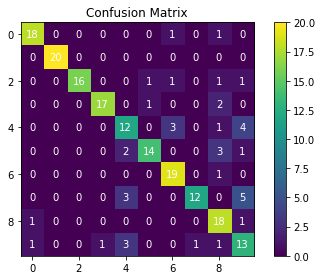

In [18]:
probabilities_matrix = np.ones((200, 10))
for k in range(10):    
    for i in range(200):
        for j in range(784):
            probabilities_matrix[i][k] = probabilities_matrix[i][k] * calculate_guassian(test_images[i][j],means_matrix[j][k],variance_matrix[j][k])
prob_matrix_transpose = np.transpose(probabilities_matrix)
cm = np.zeros((10,10))



for i in range(200):
    predict = int(np.where(prob_matrix_transpose == np.amax(prob_matrix_transpose[0:,i:i+1]))[0][0])
    label = int(labels[i])
    cm[label:label+1, predict:predict+1] += 1

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.tight_layout()
    
for i in range(10):
    for j in range(10):
        plt.text(j, i, int(cm[i, j]), ha="center", va="center", color="w")

plt.savefig('Confusion-Guass.jpg')